# Libraries

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Filter

Реализуем диагональный фильтр, посмотрим пару примеров с ним
- реализуем функцию `filter(img)`, которая обратаывает изображение фильтром 3 на 3 для определения диагональных элементов;
- затем проверим ее работу на данных MNIST для единиц и двоек.

In [14]:
def filter(img):
    # TODO: Реализовать 3 на 3 фильтр выделение вертикальной полосы в середине фрагмента. НЕ ЗАБУДЬТЕ ПРО НОРМИРОВОЧНУЮ КОНСТАНТУ
    matr = np.array([[1, 0, -0], [-0, 1, -0], [-0, -0, -1]])
        
    # Результат преобразования
    ans = np.zeros((img.shape[0]-matr.shape[0]+1, img.shape[1]-2))

    # Применим фильтр
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            # TODO: В новом изображении будет находится отклик на фильтр, 
            # т.е. сумма произведения фильтра на фрагмент изображения
            ans[i-1, j-1] = np.sum(matr*img[i-1:i+2, j-1:j+2])

    return ans


In [15]:
# Простой тест для работы фильтра
assert filter(np.eye(3))[0, 0] == 1


print("OK")

OK


## Данные MNIST

Возьмем 2 изображения -- 1-ое для единицы, 2-ое для двойки и псмотрим на их матрицы яркости -- результата свертки.

In [16]:
X, y = np.load("../2nd Task/Mnist_X.npy"), np.load("../2nd Task/Mnist_y.npy")

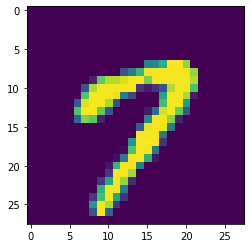

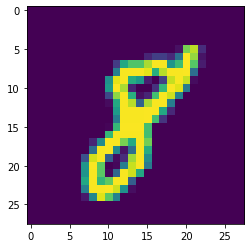

In [17]:
done_one = False
done_two = False
cnt_1 = 0
for i, (x, label) in enumerate(zip(X, y)):
    if label == 7 and not done_one and cnt_1 > 0:
        plt.imshow(x)
        plt.show()
        x_1 = x
        done_one = True
    elif label == 8 and not done_two:
        plt.imshow(x)
        plt.show()
        x_2 = x
        done_two = True
    elif label == 1 and not done_one:
        cnt_1 += 1
    if done_two and done_one:
        break

## Применим свертку

Проверим результат, 10 раз последовательно применив свертку к нормированному изображению, т.е. предварительно поделим на максимум изображения(255).

0.003671485529299526


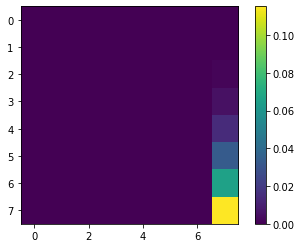

In [7]:
# Цифра 2

# Нормировка
im_0 = x_2/255

# 10 раз последовательно применим фильтр
for i in range(10):
    im_0 = filter(im_0)

# Визуализируем результат
plt.imshow(im_0)
# Выведем столбец "интенсивности"
plt.colorbar()

# Напечатаем средний отклик на всем изображении
print(im_0.mean())

0.06488323485247707


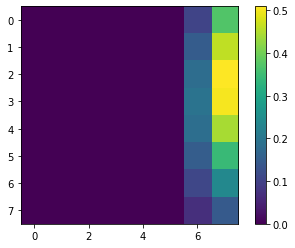

In [8]:
# Цифра 1

# Нормировка
im_1 = x_1/255

# 10 раз последовательно применим фильтр
for i in range(10):
    im_1 = filter(im_1)

# Визуализируем результат
plt.imshow(im_1)

# Выведем столбец "интенсивности"
plt.colorbar()

# Напечатаем средний отклик на всем изображении
print(im_1.mean())

# Pooling

- Напишем функцию `pool(img)`, применяющую max-pooling 2х2 для изображения

In [9]:
def pool(img):

    # Выведем размер исходного изображения(для того, чтобы видеть, как пулинг преобразует изображение)
    print(img.shape)

    # Результат преобразования
    ans = np.zeros((img.shape[0]//2+img.shape[0]%2, img.shape[1]//2+img.shape[1]%2))

    # Так как фрагменты 2х2, то шагаем в цикле с длиной 2
    for i in range(0, img.shape[0], 2):
        for j in range(0, img.shape[1], 2):
            # TODO: Реализуйте сам max-pooling
            ans[i//2][j//2] = np.max(img[i:i+1, j:j+2])

    return ans

## Применим свертку+пулинг

Проверим результат, 2 раза последовательно применив свертку к нормированному изображению и пулинг.

(26, 26)
(11, 11)
0.2972645848462842


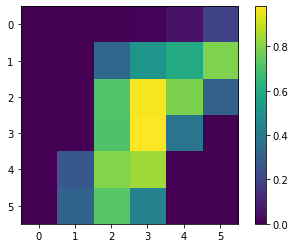

In [10]:
# Цифра 2

# Нормировка
im_2 = x_2/255

# 2 последовательных преобразования
for i in range(2):
    im_2 = pool(filter(im_2))

# Выведем результат
plt.imshow(im_2)

# Интенсивность отклика
plt.colorbar()

# Выведем среднее значение
print(im_2.mean())

(26, 26)
(11, 11)
0.26259985475671743


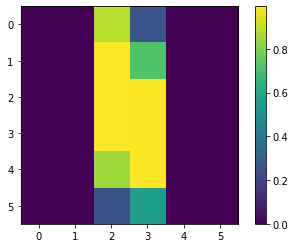

In [10]:
# Цифра 1

# Нормировка
im_1 = x_1/255

# 2 последовательных преобразования
for i in range(2):
    im_1 = pool(filter(im_1))

# Выведем результат
plt.imshow(im_1)

# Интенсивность отклика
plt.colorbar()

# Выведем среднее значение
print(im_1.mean())